In [15]:
import pandas as pd
import numpy as np

In [16]:
df= pd.read_excel('bike_dataset.xlsx')

In [17]:
df.head()

,S.no,Bike_company,Bike_model,Manufactured_year,Engine_warranty,Engine_type,Fuel_type,CC(Cubic capacity),Fuel_Capacity,Price
0,1,Bajaj,Avenger 220,2020,5.0,Single,Petrol,220CC,10 Litres,113000
1,2,TVS,Apache RTR,2020,5.0,V-twin,Petrol,120CC,11 Litres,70000
2,3,Hero,Passion,2020,5.0,Boxer,Petrol,140CC,12 Litres,85000
3,4,Honda,Activa 3G,2020,5.0,Single,Petrol,150CC,13 Litres,90000
4,5,Suzuki,Access,2020,5.0,V-twin,Petrol,350CC,14 Litres,65000


In [18]:
## Removing the units that are associated with the values
df['CC(Cubic capacity)']= df['CC(Cubic capacity)'].str.replace(r"CC",'')
df['Fuel_Capacity']= df['Fuel_Capacity'].str.replace(r"Litres",'')

df=df.drop(["S.no"],axis=1)

In [19]:
df['Fuel_Capacity'] = pd.to_numeric(df['Fuel_Capacity'], errors='coerce')

In [20]:
df.head(100)

,Bike_company,Bike_model,Manufactured_year,Engine_warranty,Engine_type,Fuel_type,CC(Cubic capacity),Fuel_Capacity,Price
0,Bajaj,Avenger 220,2020,5.0,Single,Petrol,220,10.0,113000
1,TVS,Apache RTR,2020,5.0,V-twin,Petrol,120,11.0,70000
2,Hero,Passion,2020,5.0,Boxer,Petrol,140,12.0,85000
3,Honda,Activa 3G,2020,5.0,Single,Petrol,150,13.0,90000
4,Suzuki,Access,2020,5.0,V-twin,Petrol,350,14.0,65000
...,...,...,...,...,...,...,...,...,...
95,Ducati,Aboarder,2020,5.0,Single,Petrol,890,28.0,650000
96,Ducati,Hsness,2019,5.0,Single,Petrol,900,29.0,790000
97,Bajaj,Avenger 150,2020,5.0,Single,Petrol,150,20.0,103000
98,Bajaj,Pulsar,2019,5.0,V-twin,Petrol,150,21.0,101000


In [21]:
df.shape

(308, 9)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Bike_company        308 non-null    object 
 1   Bike_model          308 non-null    object 
 2   Manufactured_year   308 non-null    int64  
 3   Engine_warranty     306 non-null    float64
 4   Engine_type         308 non-null    object 
 5   Fuel_type           308 non-null    object 
 6   CC(Cubic capacity)  308 non-null    object 
 7   Fuel_Capacity       267 non-null    float64
 8   Price               308 non-null    int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 21.8+ KB


In [23]:
# checking the missing or null values
df.isnull().sum()

Bike_company           0
Bike_model             0
Manufactured_year      0
Engine_warranty        2
Engine_type            0
Fuel_type              0
CC(Cubic capacity)     0
Fuel_Capacity         41
Price                  0
dtype: int64

<Axes: >

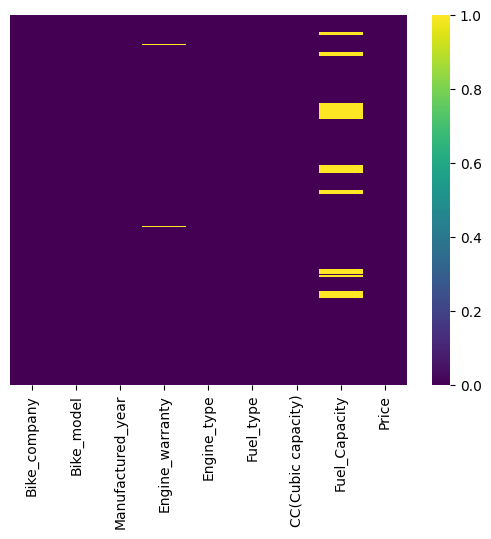

In [24]:
import seaborn as sns
sns.heatmap(df.isnull(), yticklabels = False,  cmap='viridis')

In [25]:
df=df.dropna(axis=0) #drops the rows with missing values

In [26]:
df.isnull().sum()

Bike_company          0
Bike_model            0
Manufactured_year     0
Engine_warranty       0
Engine_type           0
Fuel_type             0
CC(Cubic capacity)    0
Fuel_Capacity         0
Price                 0
dtype: int64

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('seaborn')

C:\Users\91629\AppData\Local\Temp\ipykernel_17356\3940844797.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn')


In [28]:
df.columns

Index(['Bike_company', 'Bike_model', 'Manufactured_year', 'Engine_warranty',
       'Engine_type', 'Fuel_type', 'CC(Cubic capacity)', 'Fuel_Capacity',
       'Price'],
      dtype='object')

Engine_type
Boxer                 87
V-twin                71
Single                69
Two-Stroke            16
Dual Stroke           15
Oxidiser-Air inlet     7
Name: count, dtype: int64


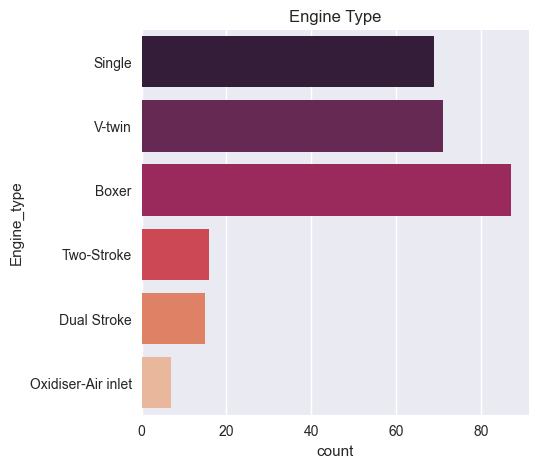

In [29]:
fig= plt.figure(figsize=(5,5))
sns.countplot(y="Engine_type",data=df,palette="rocket")
plt.title('Engine Type')
print(df['Engine_type'].value_counts())

Text(0.5, 1.0, 'Fuel Type Distribution')

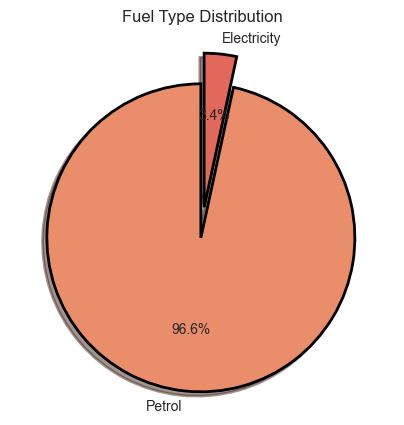

In [30]:
fig= plt.figure(figsize=(5,5))
colors=sns.color_palette('flare')
wp={'linewidth':2, 'edgecolor':"black"}
explode=(0.1,0.1)
tags = df["Fuel_type"].value_counts()
tags.plot(kind='pie',autopct='%1.1f%%',shadow=True, colors=colors,startangle=90,
          wedgeprops=wp, explode=explode, label='')
plt.title('Fuel Type Distribution')


In [31]:
# visualizations between categorical columns and price of bike
fueltype= df['Fuel_type']
enginetype= df['Engine_type']
price=df['Price']


<Axes: xlabel='Engine_type', ylabel='Price'>

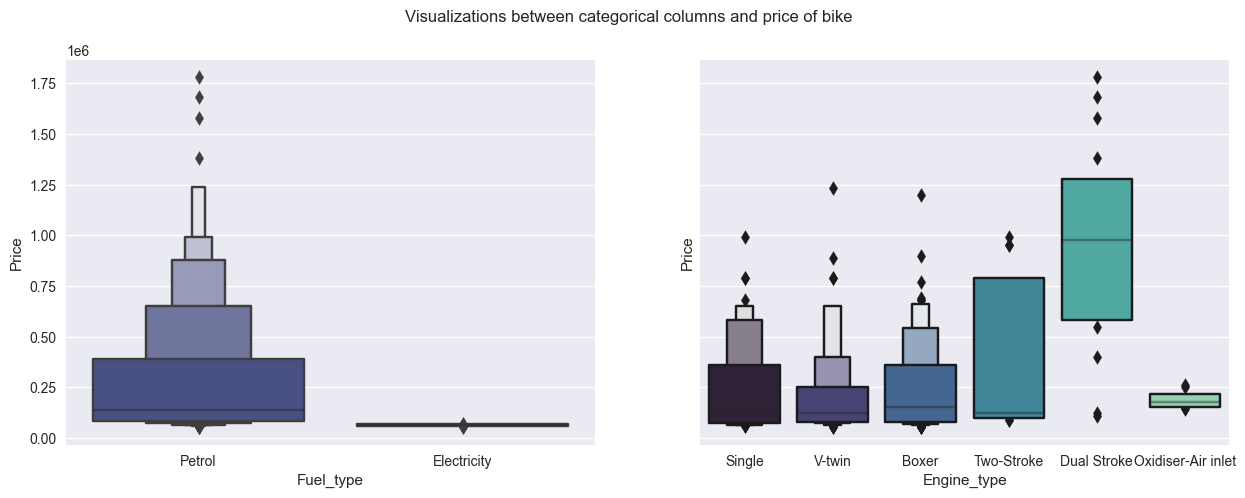

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True) #sharey means sharing the y axis
fig.suptitle('Visualizations between categorical columns and price of bike')

sns.boxenplot(x=fueltype, y=price, data=df, ax=axes[0],palette='mako')
sns.boxenplot(x=enginetype, y=price, data=df, ax=axes[1],palette='mako')

Text(0, 0.5, 'Number of Bikes')

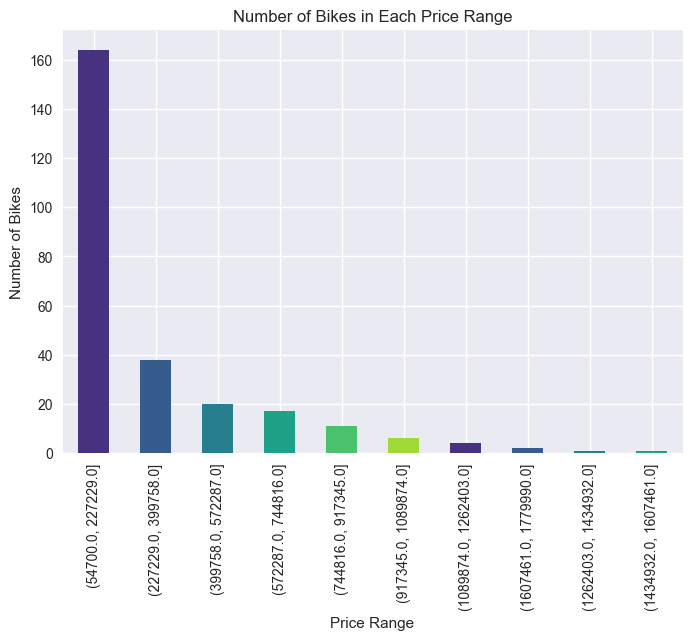

In [33]:
num_bins = 10
price_min = df['Price'].min()
price_max = df['Price'].max()
bin_width = (price_max - price_min) / num_bins
bin_edges = [price_min + i * bin_width for i in range(num_bins + 1)]

# Create a new column with the price range for each bike
df['Price Range'] = pd.cut(df['Price'], bins=bin_edges)

# Count the number of bikes in each price range and plot a bar graph
bike_counts = df['Price Range'].value_counts()
color=sns.color_palette("viridis")
bike_counts.plot(kind='bar',color=color)

# Set the plot title and labels
plt.title('Number of Bikes in Each Price Range')
plt.xlabel('Price Range')
plt.ylabel('Number of Bikes')

               Bike_model    Price
269  Triumph Panther 1250  1779990
268    Triumph Tiger 1200  1679900
259         Triumph Tiger  1579999
260   Triumph Thunderbird  1379999
50                G 320 X  1234500
49                G 310 S  1200000
258    Triumph Bournville  1179909
257        Triumph Rocket  1089999
48               F 990 XR   990000
121               Monster   990000


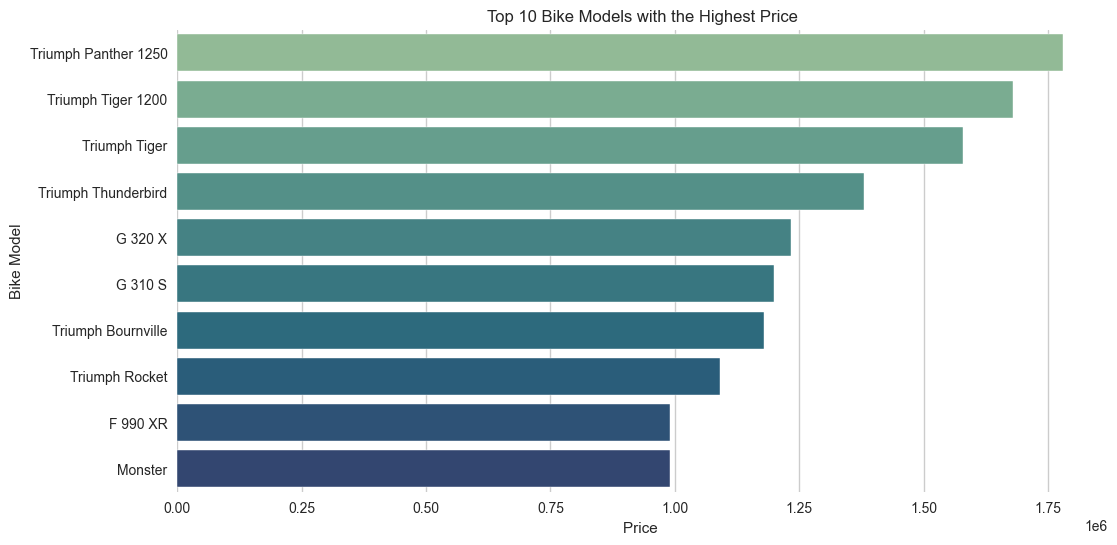

In [34]:
top10_models = df.nlargest(10, 'Price')[['Bike_model', 'Price']]
print(top10_models)
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
sns.barplot(y='Bike_model', x='Price', data=top10_models, palette="crest")
plt.ylabel('Bike Model')
plt.xlabel('Price ')
plt.title('Top 10 Bike Models with the Highest Price')
plt.show()

               Bike_model  CC(Cubic capacity)
182             Activa 4G                1350
269  Triumph Panther 1250                1250
50                G 320 X                1225
268    Triumph Tiger 1200                1200
49                G 310 S                1025
264         Triumph Rider                1025
263         Triumph Racer                1000
48               F 990 XR                 990
262   Triumph SpeedMaster                 979
54                  G 900                 917


Text(0.5, 1.0, 'Top 10 Bike Models with the Highest CC')

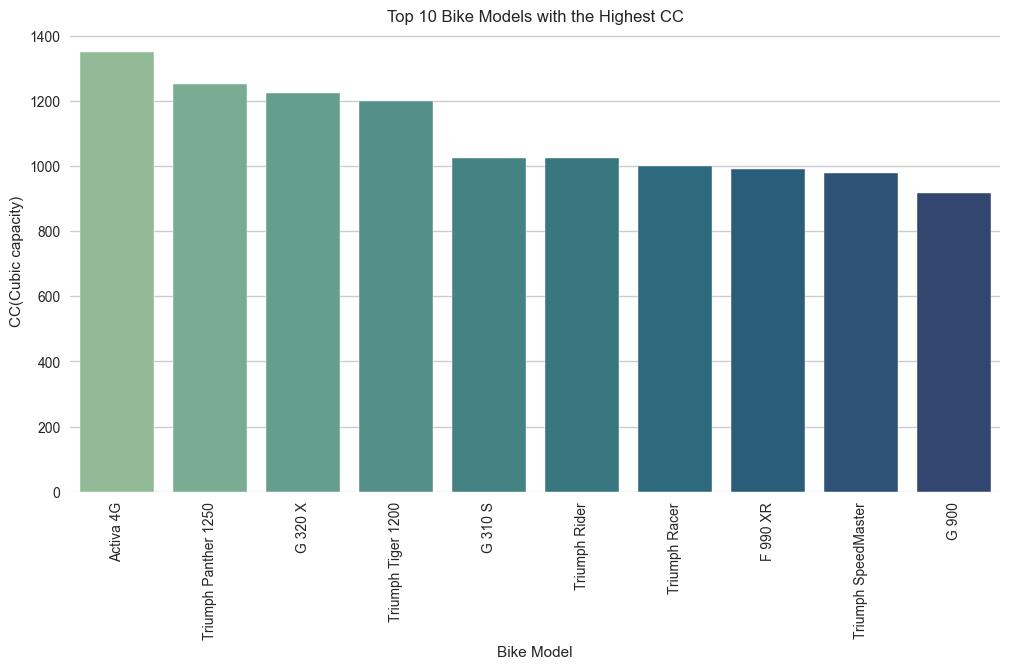

In [35]:

df['CC(Cubic capacity)'] = pd.to_numeric(df['CC(Cubic capacity)'], errors='coerce')  # convert 'Fuel Capacity' column to numeric dtype
top10cc = df.nlargest(10, 'CC(Cubic capacity)')[['Bike_model', 'CC(Cubic capacity)']]
print(top10cc)
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
sns.barplot(x='Bike_model', y='CC(Cubic capacity)', data=top10cc, palette="crest")
plt.xticks(rotation=90)
plt.xlabel('Bike Model')
plt.ylabel('CC(Cubic capacity)')
plt.title('Top 10 Bike Models with the Highest CC')


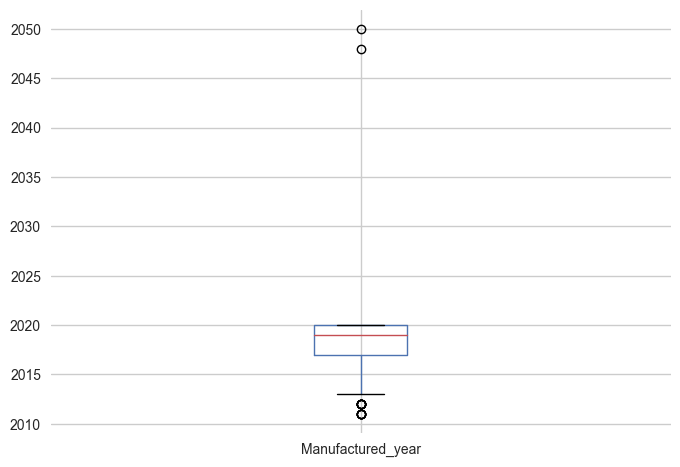

In [36]:
fig=df.boxplot(column="Manufactured_year")

In [38]:
from scipy import stats

z_scores = stats.zscore(df['Manufactured_year'])

outliers = df[(z_scores < -3) | (z_scores > 3)]

print('Outliers:')
print(outliers)

Outliers:
        Bike_company       Bike_model  Manufactured_year  Engine_warranty  \
192  Harley Davidson  Davidson Street               2048             12.0   
200         Kawasaki     Ninja Kaboom               2050              8.0   

    Engine_type Fuel_type  CC(Cubic capacity)  Fuel_Capacity   Price  \
192      V-twin    Petrol                 440           23.0  440000   
200      Single    Petrol                 370           19.0   95599   

              Price Range  
192  (399758.0, 572287.0]  
200   (54700.0, 227229.0]  


In [42]:
from scipy import stats

z_scores = stats.zscore(df['Manufactured_year'])

outliers = df[(z_scores < -3) | (z_scores > 3)]

print('Outliers:')
print(outliers)

Outliers:
Empty DataFrame
Columns: [Bike_company, Bike_model, Manufactured_year, Engine_warranty, Engine_type, Fuel_type, CC(Cubic capacity), Fuel_Capacity, Price, Price Range]
Index: []


In [43]:
df = df.drop(outliers.index)

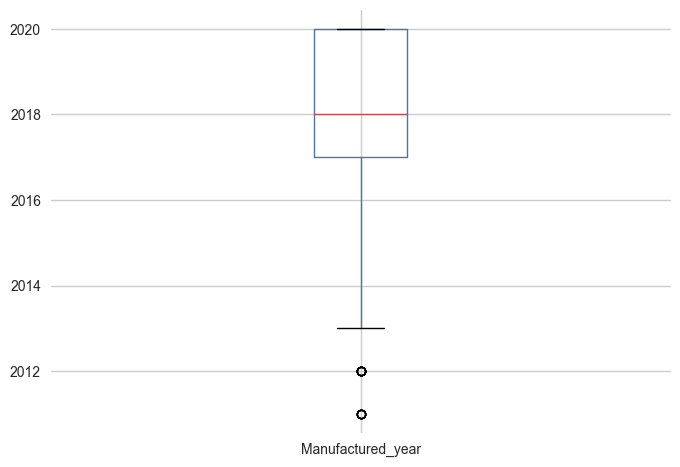

In [44]:
fig=df.boxplot(column="Manufactured_year")

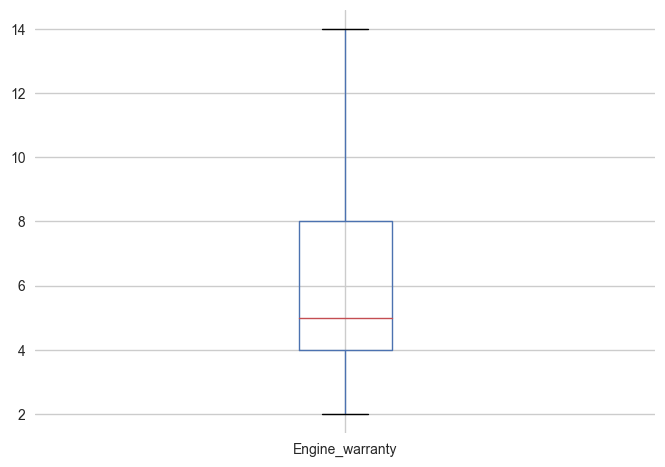

In [45]:
fig=df.boxplot(column="Engine_warranty")

In [46]:
#df = df.drop(outliers.index)


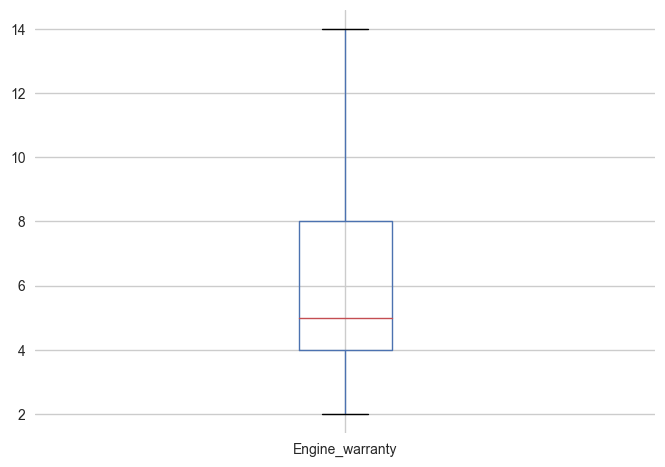

In [47]:
fig=df.boxplot(column="Engine_warranty")

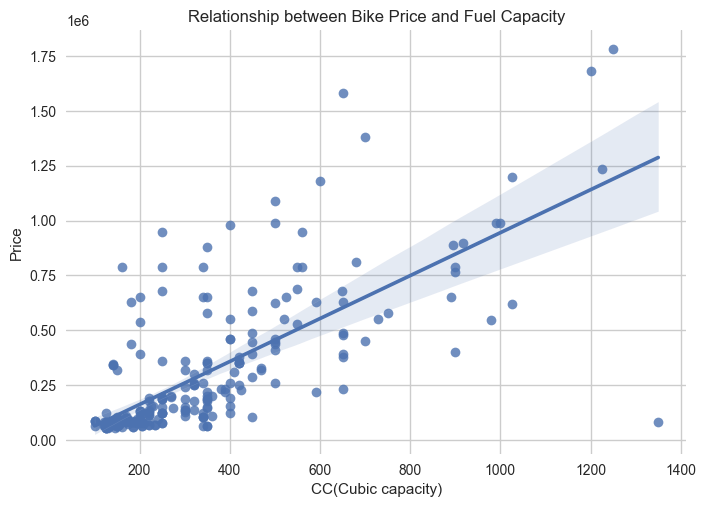

In [48]:
sns.regplot(x='CC(Cubic capacity)', y='Price', data=df)
plt.xlabel('CC(Cubic capacity)')
plt.ylabel('Price')
plt.title('Relationship between Bike Price and Fuel Capacity')
plt.show()

In [49]:
import datetime
current_year = datetime.datetime.now().year

# Calculate age of bike
df['Age_of_bike'] = current_year - df['Manufactured_year']

In [50]:
df['Remaining_warranty'] = df['Engine_warranty'] - df['Age_of_bike']
df['Remaining_warranty'] = df['Remaining_warranty'].apply(lambda x: x if x > 0 else 0)


In [51]:
df.head()

,Bike_company,Bike_model,Manufactured_year,Engine_warranty,Engine_type,Fuel_type,CC(Cubic capacity),Fuel_Capacity,Price,Price Range,Age_of_bike,Remaining_warranty
0,Bajaj,Avenger 220,2020,5.0,Single,Petrol,220,10.0,113000,"(54700.0, 227229.0]",3,2.0
1,TVS,Apache RTR,2020,5.0,V-twin,Petrol,120,11.0,70000,"(54700.0, 227229.0]",3,2.0
2,Hero,Passion,2020,5.0,Boxer,Petrol,140,12.0,85000,"(54700.0, 227229.0]",3,2.0
3,Honda,Activa 3G,2020,5.0,Single,Petrol,150,13.0,90000,"(54700.0, 227229.0]",3,2.0
4,Suzuki,Access,2020,5.0,V-twin,Petrol,350,14.0,65000,"(54700.0, 227229.0]",3,2.0


Text(0.5, 1.0, 'Age of Bike')

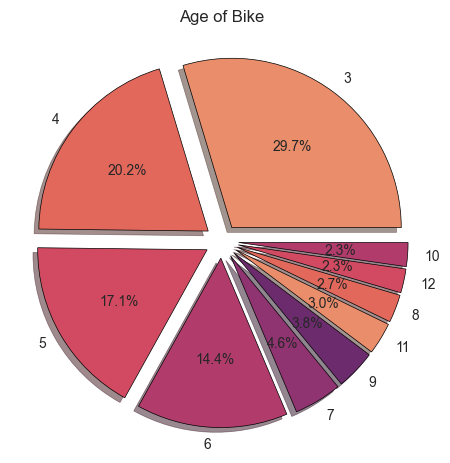

In [52]:
colors=sns.color_palette('flare')
wp={'linewidth':0.5, 'edgecolor':"black"}
explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
tags = df["Age_of_bike"].value_counts()
tags.plot(kind='pie',autopct='%1.1f%%',shadow=True, colors=colors,
          wedgeprops=wp, explode=explode, label='')
plt.title("Age of Bike")

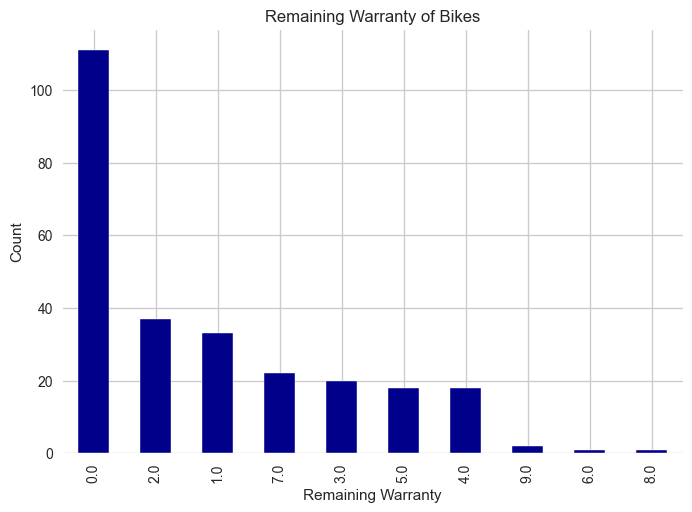

In [53]:
df['Remaining_warranty'].value_counts().plot(kind='bar', color='darkblue')
plt.xlabel('Remaining Warranty')
plt.ylabel('Count')
plt.title('Remaining Warranty of Bikes')
plt.show()


In [54]:
final_df=df[[ 'Engine_warranty',
       'Engine_type', 'Fuel_type', 'CC(Cubic capacity)', 'Fuel_Capacity',
       'Price', 'Age_of_bike', 'Remaining_warranty']]

In [55]:
final_df.columns

Index(['Engine_warranty', 'Engine_type', 'Fuel_type', 'CC(Cubic capacity)',
       'Fuel_Capacity', 'Price', 'Age_of_bike', 'Remaining_warranty'],
      dtype='object')

In [56]:
final_df.head()

,Engine_warranty,Engine_type,Fuel_type,CC(Cubic capacity),Fuel_Capacity,Price,Age_of_bike,Remaining_warranty
0,5.0,Single,Petrol,220,10.0,113000,3,2.0
1,5.0,V-twin,Petrol,120,11.0,70000,3,2.0
2,5.0,Boxer,Petrol,140,12.0,85000,3,2.0
3,5.0,Single,Petrol,150,13.0,90000,3,2.0
4,5.0,V-twin,Petrol,350,14.0,65000,3,2.0


In [57]:
print(final_df['Engine_type'].unique())
print(final_df['Fuel_type'].unique())
# checking the unique valuies of these categorical features

['Single' 'V-twin' 'Boxer' 'Two-Stroke' 'Dual Stroke' 'Oxidiser-Air inlet']
['Petrol' 'Electricity']


In [58]:
# Encoding
from sklearn.preprocessing import LabelEncoder
Numerics= LabelEncoder()

# Define the mapping dictionary
engine_type_mapping = {'Single': 0, 'V-twin': 1, 'Boxer': 2, 'Two-Stroke': 3, 'Dual Stroke': 4, 'Oxidiser-Air inlet': 5}

# Assign numeric values to the 'Engine_type' feature
final_df['Engine_Type'] = final_df['Engine_type'].map(engine_type_mapping)

# Print the unique encoded values
print(final_df['Engine_Type'].unique())

# Define the mapping dictionary
fuel_type_mapping = {'Petrol': 0, 'Electricity': 1}

# Assign numeric values to the 'Fuel_type' feature
final_df['Fuel_Type'] = final_df['Fuel_type'].map(fuel_type_mapping)

# Print the unique encoded values
print(final_df['Fuel_Type'].unique())


[0 1 2 3 4 5]
[0 1]


C:\Users\91629\AppData\Local\Temp\ipykernel_17356\1751382949.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Engine_Type'] = final_df['Engine_type'].map(engine_type_mapping)
C:\Users\91629\AppData\Local\Temp\ipykernel_17356\1751382949.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Fuel_Type'] = final_df['Fuel_type'].map(fuel_type_mapping)


In [59]:
# New encoded columns
#final_df['Engine_Type']=Numerics.fit_transform(final_df['Engine_type'])
#final_df['Fuel_Type']=Numerics.fit_transform(final_df['Fuel_type'])
final_df = final_df.drop(['Engine_type', 'Fuel_type'], axis=1)

In [60]:
final_df.head()

,Engine_warranty,CC(Cubic capacity),Fuel_Capacity,Price,Age_of_bike,Remaining_warranty,Engine_Type,Fuel_Type
0,5.0,220,10.0,113000,3,2.0,0,0
1,5.0,120,11.0,70000,3,2.0,1,0
2,5.0,140,12.0,85000,3,2.0,2,0
3,5.0,150,13.0,90000,3,2.0,0,0
4,5.0,350,14.0,65000,3,2.0,1,0


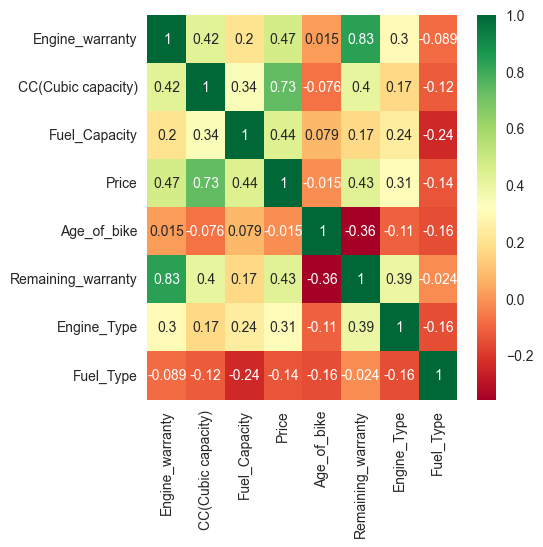

In [61]:
corrmat=final_df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(5,5))
g=sns.heatmap(final_df[top_corr_features].corr(), annot=True,cmap="RdYlGn")

In [62]:
final_df.head()

,Engine_warranty,CC(Cubic capacity),Fuel_Capacity,Price,Age_of_bike,Remaining_warranty,Engine_Type,Fuel_Type
0,5.0,220,10.0,113000,3,2.0,0,0
1,5.0,120,11.0,70000,3,2.0,1,0
2,5.0,140,12.0,85000,3,2.0,2,0
3,5.0,150,13.0,90000,3,2.0,0,0
4,5.0,350,14.0,65000,3,2.0,1,0


In [63]:
final_df= final_df.drop(["Engine_warranty"],axis=1)

In [64]:
final_df=final_df.reindex(columns=['Price','CC(Cubic capacity)','Fuel_Capacity','Age_of_bike','Remaining_warranty','Engine_Type','Fuel_Type'])


In [65]:
final_df['Fuel_Capacity'] = final_df['Fuel_Capacity'].replace('Battery',0)


In [66]:
#final_df= final_df.drop(["Engine_Type"],axis=1)
final_df= final_df.drop(["Age_of_bike"],axis=1)
#final_df= final_df.drop(["Fuel_Type"],axis=1)
final_df.head()

,Price,CC(Cubic capacity),Fuel_Capacity,Remaining_warranty,Engine_Type,Fuel_Type
0,113000,220,10.0,2.0,0,0
1,70000,120,11.0,2.0,1,0
2,85000,140,12.0,2.0,2,0
3,90000,150,13.0,2.0,0,0
4,65000,350,14.0,2.0,1,0


In [67]:
X=final_df.iloc[:,1:]
y=final_df.iloc[:,0]

In [68]:
X.head(100)

,CC(Cubic capacity),Fuel_Capacity,Remaining_warranty,Engine_Type,Fuel_Type
0,220,10.0,2.0,0,0
1,120,11.0,2.0,1,0
2,140,12.0,2.0,2,0
3,150,13.0,2.0,0,0
4,350,14.0,2.0,1,0
...,...,...,...,...,...
116,250,27.0,3.0,1,0
117,200,28.0,0.0,3,0
118,350,29.0,3.0,3,0
119,340,30.0,2.0,3,0


In [69]:
y.head()

0    113000
1     70000
2     85000
3     90000
4     65000
Name: Price, dtype: int64

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Ridge, Lasso

from sklearn import metrics

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred1 = lr.predict(X_test)
score1 = metrics.r2_score(y_test, y_pred1)

# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred2 = rf.predict(X_test)
score2 = metrics.r2_score(y_test, y_pred2)

# Gradient Boosting
xgb = GradientBoostingRegressor()
xgb.fit(X_train, y_train)
y_pred3 = xgb.predict(X_test)
score3 = metrics.r2_score(y_test, y_pred3)

# XGBoost
xg = XGBRegressor()
xg.fit(X_train, y_train)
y_pred4 = xg.predict(X_test)
score4 = metrics.r2_score(y_test, y_pred4)



# Support Vector Machines (SVM)
svm = SVR()
svm.fit(X_train, y_train)
y_pred6 = svm.predict(X_test)
score6 = metrics.r2_score(y_test, y_pred6)

# K-Nearest Neighbors (KNN)
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
y_pred7 = knn.predict(X_test)
score7 = metrics.r2_score(y_test, y_pred7)

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred8 = nb.predict(X_test)
score8 = metrics.r2_score(y_test, y_pred8)

# Ridge Regression
ridge = Ridge(alpha=0.5)  # alpha is the regularization strength
ridge.fit(X_train, y_train)
y_pred9 = ridge.predict(X_test)
score9 = metrics.r2_score(y_test, y_pred9)

# Lasso Regression
lasso = Lasso(alpha=0.5)  # alpha is the regularization strength
lasso.fit(X_train, y_train)
y_pred10 = lasso.predict(X_test)
score10 = metrics.r2_score(y_test, y_pred10)

In [72]:
xgb = GradientBoostingRegressor()
xgb.fit(X_train, y_train)
y_pred3 = xgb.predict(X_test)
score3 = metrics.r2_score(y_test, y_pred3)

In [73]:
print("Linear Regression Score:", score1)
print("Random Forest Score:", score2)
print("Gradient Boosting Score:", score3)
print("XGBoost Score:", score4)
#print("Gradient Boosting Score (2nd algorithm):", score5)
print("Support Vector Machines (SVM) Score:", score6)
print("K-Nearest Neighbors (KNN) Score:", score7)
print("Naive Bayes Score:", score8)
print("Ridge Regression Score:", score9)
print("Lasso Regression Score:", score10)


Linear Regression Score: 0.6174030854859085
Random Forest Score: 0.736496936760208
Gradient Boosting Score: 0.7566940340806305
XGBoost Score: 0.6742197334742199
Support Vector Machines (SVM) Score: -0.4141774035687269
K-Nearest Neighbors (KNN) Score: 0.6020932614004102
Naive Bayes Score: 0.3108939390558566
Ridge Regression Score: 0.6174359662222044
Lasso Regression Score: 0.6174033913434501


In [74]:
# import pickle

# # Calculate the maximum score and corresponding model
# max_score = max(score1, score2, score3, score4,  score6, score7, score8, score9, score10)

# if max_score == score1:
#     selected_model = lr
# elif max_score == score2:
#     selected_model = rf
# elif max_score == score3:
#     selected_model = xgb
# elif max_score == score4:
#     selected_model = xg

# elif max_score == score6:
#     selected_model = svm
# elif max_score == score7:
#     selected_model = knn
# elif max_score == score8:
#     selected_model = nb
# elif max_score == score9:
#     selected_model = ridge
# else:
#     selected_model = lasso

# # Save the selected model as a pickle file
# with open("selected_model.pkl", "wb") as file:
#     pickle.dump(selected_model, file)

In [75]:
import pickle
gb_pkl = 'model/gb.pkl'
# Open the file to save as pkl file
gb_Model_pkl = open(gb_pkl, 'wb')
pickle.dump(xgb, gb_Model_pkl)
# Close the pickle instances
gb_Model_pkl.close()
